In [682]:
!pip install pymongo

In [683]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [684]:
import warnings
warnings.filterwarnings('ignore')


In [685]:
data = pd.read_csv("D:/CSV/Flights_Delay.csv")

In [686]:
data.isnull().sum() 

ID                         0
YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              404
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          2097
DEPARTURE_DELAY         2097
TAXI_OUT                2134
WHEELS_OFF              2134
SCHEDULED_TIME             0
ELAPSED_TIME            2302
AIR_TIME                2302
DISTANCE                   0
WHEELS_ON               2189
TAXI_IN                 2189
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2189
ARRIVAL_DELAY           2302
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    53849
AIR_SYSTEM_DELAY       43818
SECURITY_DELAY         43818
AIRLINE_DELAY          43818
LATE_AIRCRAFT_DELAY    43818
WEATHER_DELAY          43818
dtype: int64

In [687]:
data.isnull().sum() / len(data) * 100

ID                      0.000000
YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.721429
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          3.744643
DEPARTURE_DELAY         3.744643
TAXI_OUT                3.810714
WHEELS_OFF              3.810714
SCHEDULED_TIME          0.000000
ELAPSED_TIME            4.110714
AIR_TIME                4.110714
DISTANCE                0.000000
WHEELS_ON               3.908929
TAXI_IN                 3.908929
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            3.908929
ARRIVAL_DELAY           4.110714
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    96.158929
AIR_SYSTEM_DELAY       78.246429
SECURITY_DELAY         78.246429
AIRLINE_DELAY          78.246429
LATE_AIRCR

In [688]:
data['CANCELLATION_REASON'].value_counts()

CANCELLATION_REASON
B    1535
A     347
C     269
Name: count, dtype: int64

In [689]:
data['ARRIVAL_DELAY'].fillna(data['ARRIVAL_DELAY'].mean(), inplace=True)
data['ARRIVAL_TIME'].fillna(data['ARRIVAL_TIME'].mean(), inplace=True)
data['DEPARTURE_TIME'].fillna(data['DEPARTURE_TIME'].mean(), inplace=True)
data['DEPARTURE_DELAY'].fillna(data['DEPARTURE_DELAY'].mean(), inplace=True)
data['TAXI_OUT'].fillna(data['TAXI_OUT'].mean(), inplace=True)
data['WHEELS_OFF'].fillna(data['WHEELS_OFF'].mean(), inplace=True)
data['ELAPSED_TIME'].fillna(data['ELAPSED_TIME'].mean(), inplace=True)
data['AIR_TIME'].fillna(data['AIR_TIME'].mean(), inplace=True)
data['WHEELS_ON'].fillna(data['WHEELS_ON'].mean(), inplace=True)
data['TAXI_IN'].fillna(data['TAXI_IN'].mean(), inplace=True)


1. Create collections “flights” inside database “airline_delayDB”

2. How would you insert this entire dataset into a MongoDB collection named flights? Describe the structure of each document.

In [690]:
collection = None
def main():
    client = pymongo.MongoClient("localhost:27017")
    db = client['airline_delayDB']
    try:
        db.bank_cust_info.drop()
    except:
        print("Collection doesn't exist")

    global collection
    collection = db['flights']
    
    # bank_df = pd.read_csv("D:/CSV/Flights_Delay.csv")
    filtered_data = data.to_dict(orient = 'records')
    if filtered_data:
        collection.insert_many(filtered_data)
        

    
if __name__ == "__main__":
   main()
    

3. Write a MongoDB command to insert a single flight record from the dataset.

In [691]:
#This code is commented to maintain the results not being affected by this dummy insert

# dummy_data = {
#   'ID': 000,
#   'YEAR': 2015,
#   'MONTH': 1,
#   'DAY': 27,
#   'DAY_OF_WEEK': 2,
#   'AIRLINE': 'B6',
#   'FLIGHT_NUMBER': 716,
#   'TAIL_NUMBER': 'N309JB',
#   'ORIGIN_AIRPORT': 'JAX',
#   'DESTINATION_AIRPORT': 'DCA',
#   'SCHEDULED_DEPARTURE': 1335,
#   'DEPARTURE_TIME': 1505.0,
#   'DEPARTURE_DELAY': 90.0,
#   'TAXI_OUT': 16.0,
#   'WHEELS_OFF': 1521.0,
#   'SCHEDULED_TIME': 104,
#   'ELAPSED_TIME': 110.0,
#   'AIR_TIME': 91.0,
#   'DISTANCE': 634,
#   'WHEELS_ON': 1652.0,
#   'TAXI_IN': 3.0,
#   'SCHEDULED_ARRIVAL': 1519,
#   'ARRIVAL_TIME': 1655.0,
#   'ARRIVAL_DELAY': 96.0,
#   'DIVERTED': 0,
#   'CANCELLED': 0,
#   'CANCELLATION_REASON': None,
#   'AIR_SYSTEM_DELAY': 6.0,
#   'SECURITY_DELAY': 0.0,
#   'AIRLINE_DELAY': 90.0,
#   'LATE_AIRCRAFT_DELAY': 0.0,
#   'WEATHER_DELAY': 0.0}

# collection.insert_one(dummy_data)



4. Write a MongoDB query to find all flights that were delayed by more than 60 minutes.


In [692]:
list(collection.find({"DEPARTURE_DELAY": {"$gt":60}}))

[{'_id': ObjectId('66d42f1e3c979cf4159a9a9e'),
  'ID': 2,
  'YEAR': 2015,
  'MONTH': 1,
  'DAY': 27,
  'DAY_OF_WEEK': 2,
  'AIRLINE': 'B6',
  'FLIGHT_NUMBER': 716,
  'TAIL_NUMBER': 'N309JB',
  'ORIGIN_AIRPORT': 'JAX',
  'DESTINATION_AIRPORT': 'DCA',
  'SCHEDULED_DEPARTURE': 1335,
  'DEPARTURE_TIME': 1505.0,
  'DEPARTURE_DELAY': 90.0,
  'TAXI_OUT': 16.0,
  'WHEELS_OFF': 1521.0,
  'SCHEDULED_TIME': 104,
  'ELAPSED_TIME': 110.0,
  'AIR_TIME': 91.0,
  'DISTANCE': 634,
  'WHEELS_ON': 1652.0,
  'TAXI_IN': 3.0,
  'SCHEDULED_ARRIVAL': 1519,
  'ARRIVAL_TIME': 1655.0,
  'ARRIVAL_DELAY': 96.0,
  'DIVERTED': 0,
  'CANCELLED': 0,
  'CANCELLATION_REASON': nan,
  'AIR_SYSTEM_DELAY': 6.0,
  'SECURITY_DELAY': 0.0,
  'AIRLINE_DELAY': 90.0,
  'LATE_AIRCRAFT_DELAY': 0.0,
  'WEATHER_DELAY': 0.0},
 {'_id': ObjectId('66d42f1e3c979cf4159a9aae'),
  'ID': 18,
  'YEAR': 2015,
  'MONTH': 2,
  'DAY': 24,
  'DAY_OF_WEEK': 2,
  'AIRLINE': 'OO',
  'FLIGHT_NUMBER': 6196,
  'TAIL_NUMBER': 'N751SK',
  'ORIGIN_AIRPORT': 

5. How would you query all flights that were cancelled (CANCELLED flag set to 1) and return only the AIRLINE, ORIGIN_AIRPORT, and CANCELLATION_REASON fields?

In [693]:
list(collection.find({"CANCELLED": 1}, {"_id":0, "AIRLINE":1, "ORIGIN_AIRPORT":1, "CANCELLATION_REASON":1 }))

[{'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'MLI', 'CANCELLATION_REASON': 'C'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'BWI', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'DL', 'ORIGIN_AIRPORT': 'SFO', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'DFW', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'MQ', 'ORIGIN_AIRPORT': 'LGA', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'BDL', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'MKE', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'US', 'ORIGIN_AIRPORT': 'DCA', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'FLL', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'ORF', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'US', 'ORIGIN_AIRPORT': 'PHL', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'MQ', 'ORIGIN_AIRPORT': 'SHV', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'UA', 'ORIGIN_AIRPORT': 'LGA', 'CANCELLATION_REASON': 'C'},
 {'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'DFW', 'CANCEL

6. Using MongoDB’s aggregation framework, how would you calculate the average arrival delay (ARRIVAL_DELAY) for each airline? [Create a suitable plot using matplotlib/seaborn]

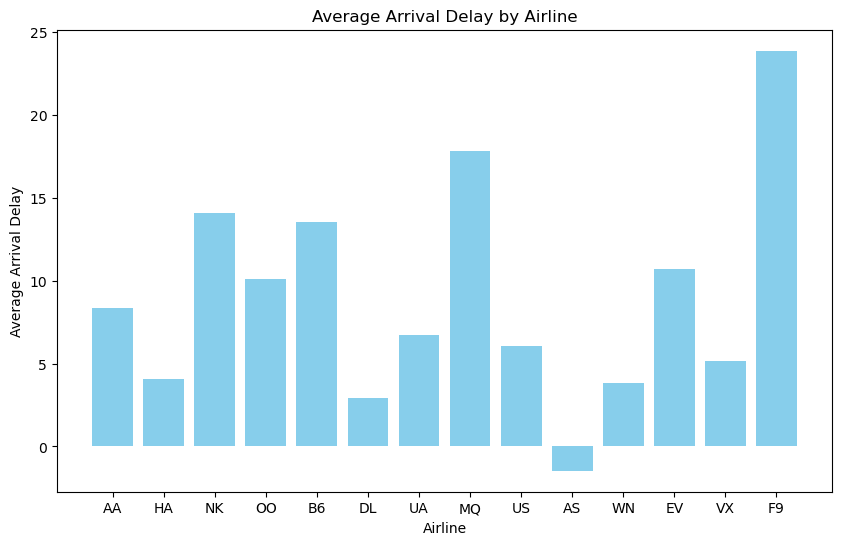

In [694]:
arrival_delay_for_each_airline = pd.DataFrame(collection.aggregate([
    {"$group":
        {
            "_id":"$AIRLINE",
            "average":{"$avg":"$ARRIVAL_DELAY"}
        }
    }
]))

plt.figure(figsize=(10, 6))
plt.bar(arrival_delay_for_each_airline['_id'], arrival_delay_for_each_airline['average'], color="skyblue")
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by Airline')
plt.show()


7. Days of months with respect to average of arrival delays. [Create a suitable plot using matplotlib/seaborn]

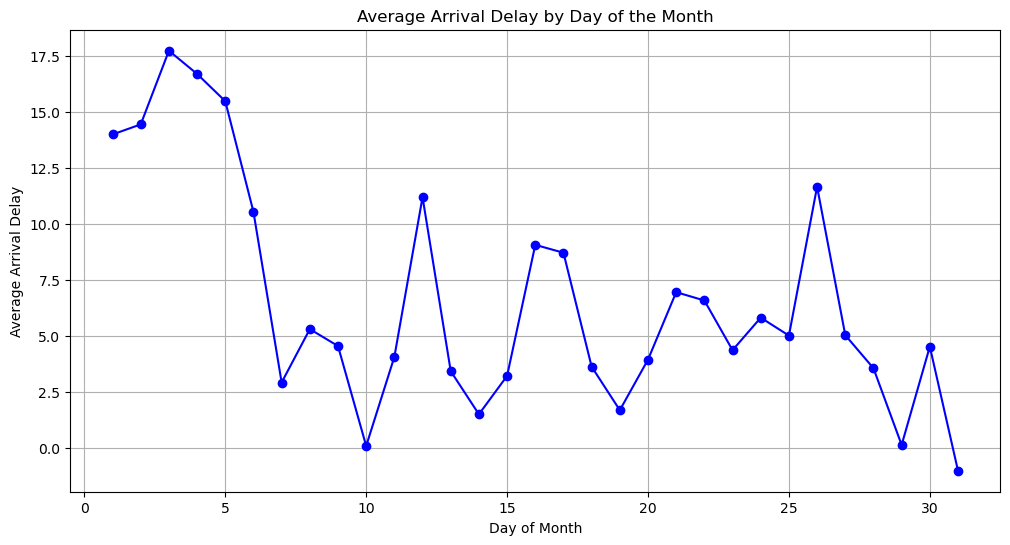

In [695]:
day_month_avg_arrival_delay =pd.DataFrame(collection.aggregate([
    {"$group":
        {
            "_id" :"$DAY",
            "avg_arrival_day":{"$avg":"$ARRIVAL_DELAY"}
        }
     },
     {"$sort":{"_id":1}}
]))
# plt.figure(figsize=(10, 6))
# plt.bar(day_month_avg_arrival_delay['_id'], day_month_avg_arrival_delay['avg_arrival_day'])
# plt.xlabel('Airline')
# plt.ylabel('Average Arrival Delay')
# plt.title('Average Arrival Delay by Airline')
# plt.show()

plt.figure(figsize=(12, 6))
plt.plot(day_month_avg_arrival_delay['_id'], day_month_avg_arrival_delay['avg_arrival_day'], marker='o', linestyle='-', color='b')
plt.xlabel('Day of Month')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by Day of the Month')
plt.grid(True)
plt.show()


8. Write a MongoDB aggregation pipeline to find the top 10 airports with the highest average total delay (DEPARTURE_DELAY + ARRIVAL DELAY).

In [696]:
pd.DataFrame(collection.aggregate([
    {"$project":
        {"_id":0,
            "airport": "$ORIGIN_AIRPORT",
            "total_delay": {
            "$add": ["$DEPARTURE_DELAY", "$ARRIVAL_DELAY"]
      }
    }
    },
    {"$group":
        {
            "_id":"$airport",
            "avg_delay":{"$avg":"$total_delay"}
        }
     },
     {"$sort":
      {
        "avg_delay":-1
     }
     },
     {
         "$limit": 10
    }
]))

,_id,avg_delay
0,HOB,250.666667
1,CDC,210.200000
2,PIH,191.200000
3,ILG,168.666667
4,HIB,168.250000
5,SCE,128.714286
6,TTN,97.891436
7,JLN,95.742001
8,SPS,93.339221
9,MBS,77.910650


9. Explain how you would create an index on the ORIGIN_AIRPORT and DESTINATION_AIRPORT fields to optimize queries filtering by these fields.

In [697]:
collection.create_index({"ORIGIN_AIRPORT":1, "DESTINATION_AIRPORT":1})

'ORIGIN_AIRPORT_1_DESTINATION_AIRPORT_1'

10. Arrange weekdays with respect to the average arrival delays caused. [Create a suitable plot using matplotlib/seaborn]

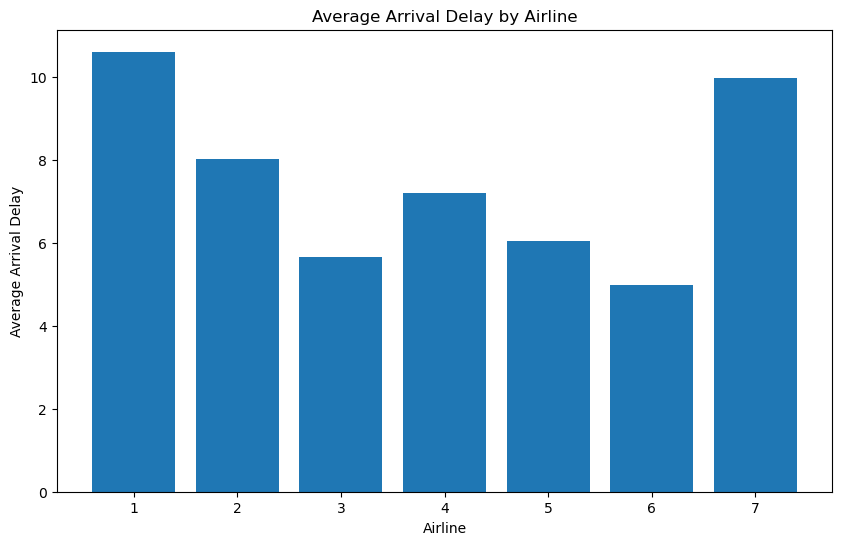

In [698]:
day_week_avg_arrival_delay =pd.DataFrame(collection.aggregate([
    {"$group":
        {
            "_id" :"$DAY_OF_WEEK",
            "avg_arrival_delay":{"$avg":"$ARRIVAL_DELAY"}
        }
     },
     {"$sort":{"_id":1}}
]))
plt.figure(figsize=(10, 6))
plt.bar(day_week_avg_arrival_delay['_id'], day_week_avg_arrival_delay['avg_arrival_delay'])
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by Airline')
plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(day_month_avg_arrival_delay['_id'], day_month_avg_arrival_delay['avg_arrival_day'], marker='o', linestyle='-', color='b')
# plt.xlabel('Day of Month')
# plt.ylabel('Average Arrival Delay')
# plt.title('Average Arrival Delay by Day of the Month')
# plt.grid(True)
# plt.show()

11. Arrange Days of month as per cancellations done in descending order.  [Create a suitable plot using matplotlib/seaborn]

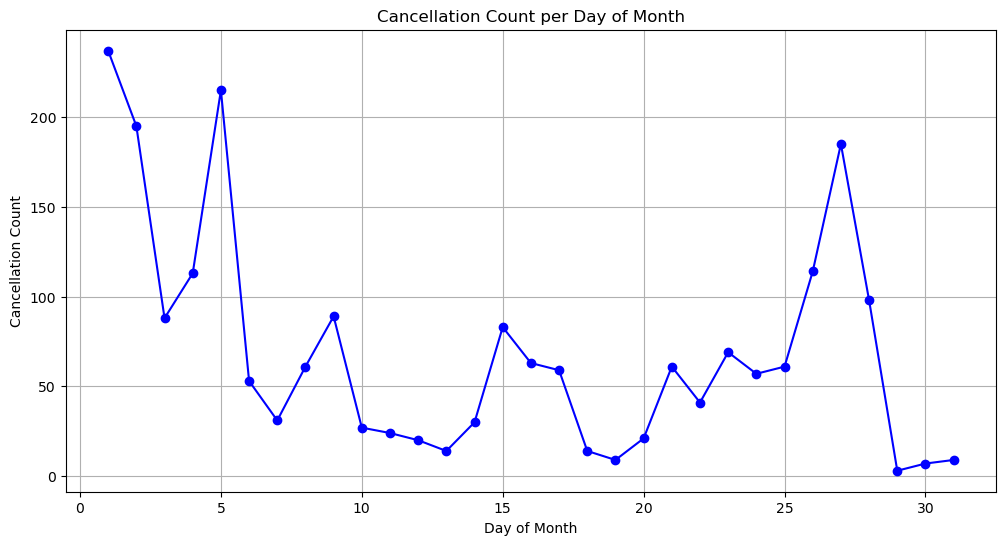

In [699]:
cancellation_count_per_day=pd.DataFrame(collection.aggregate([
    {"$match":
        {
            "CANCELLED":1
        }

    },
    {"$group":
        {
            "_id":"$DAY",
            "Cancellation_count":{"$sum": 1}
        }
    },
    {"$sort":
        {
            "_id":-1
        }
     }
]))
# cancellation_count_per_day
plt.figure(figsize=(12, 6))
plt.plot(cancellation_count_per_day['_id'], cancellation_count_per_day['Cancellation_count'], marker='o', color='b')
plt.xlabel('Day of Month')
plt.ylabel('Cancellation Count')
plt.title('Cancellation Count per Day of Month')
plt.grid(True)
plt.show()

12. Find the busiest airports with respect to day of week. Represent it by using suitable plot. 

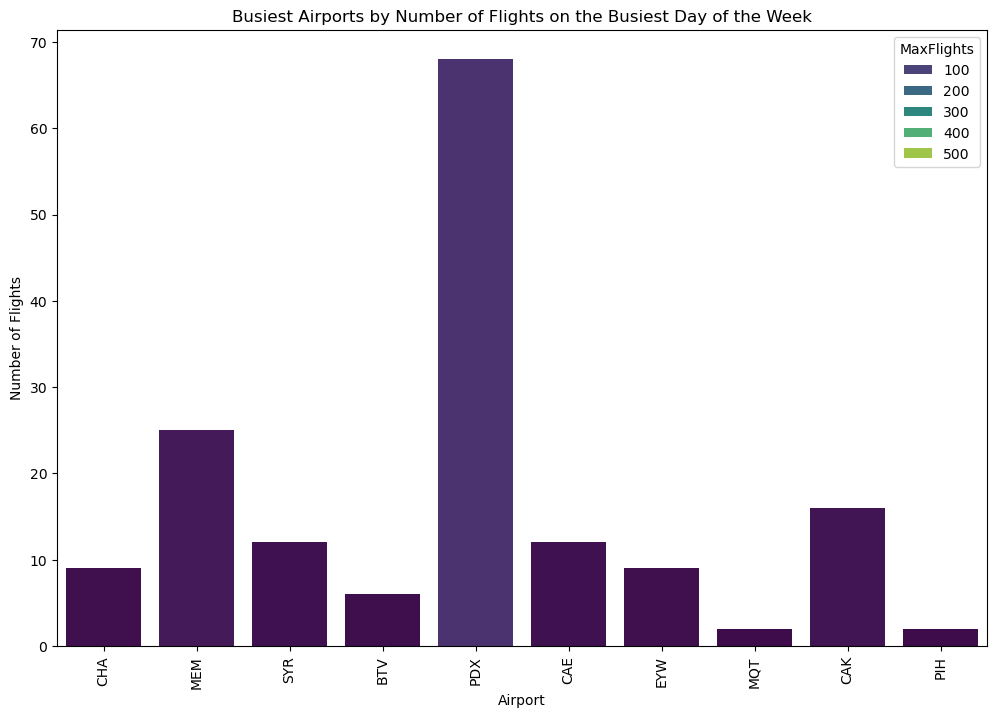

In [700]:
df = pd.DataFrame(collection.aggregate( [
    {"$group": {
        "_id": {"Airport": "$ORIGIN_AIRPORT", "Day": "$DAY_OF_WEEK"},
        "flight_count": {"$sum": 1}
    }},
    {"$sort": {"_id.Airport": 1, "flight_count": -1}}, 
    {"$group": {
        "_id": "$_id.Airport",
        "DayOfWeekWithMaxFlights": {"$first": "$_id.Day"},
        "MaxFlights": {"$first": "$flight_count"}
    }}
]))

plt.figure(figsize=(12, 8))
sns.barplot(x=df['_id'][:10], y=df['MaxFlights'][:10], palette='viridis' ,hue=df['MaxFlights'])
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.title('Busiest Airports by Number of Flights on the Busiest Day of the Week')
plt.xticks(rotation=90)
plt.show()



13. Find top 10 Airlines of US. Represent it by using suitable plot.

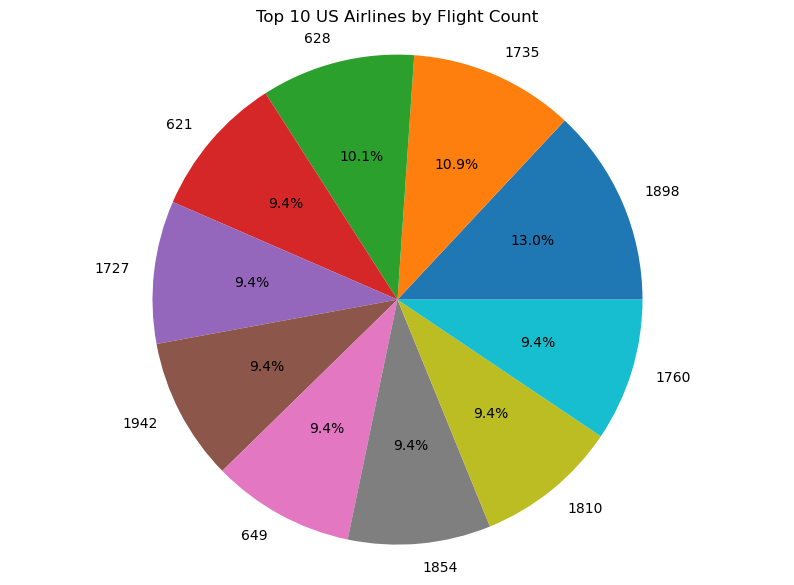

In [701]:
result = pd.DataFrame(collection.aggregate([
    {
        '$match':{'AIRLINE':'US'}
    },
    {
        '$group':
        {
            '_id':'$FLIGHT_NUMBER',
            'Flight_Count':{'$sum' : 1}
        }},
    {
        '$project':
        {
            '_id':0,
            'FLIGHT_NUMBER':'$_id',
            'Flight_Count':1
        }
    },
    {
        '$sort':
        {
            'Flight_Count':-1
        }
    },
    {
        '$limit':10
    }
]))



plt.figure(figsize=(10, 7))
plt.pie(result['Flight_Count'], labels=result['FLIGHT_NUMBER'], autopct='%1.1f%%')
plt.title('Top 10 US Airlines by Flight Count')
plt.axis('equal')  
plt.show()


14. Finding airlines that make the maximum, minimum number of cancellations.

In [702]:
pd.DataFrame(collection.aggregate([
    {
        '$match': { 'CANCELLED': 1 }  
    },
    {
        '$group': {
            '_id': '$AIRLINE',  
            'cancellations': { '$sum': 1 }
        }
    },
    {
        '$facet': {
            'max': [
                { '$sort': { 'cancellations': -1 } },  
                { '$limit': 1 } 
            ],
            'min': [
                { '$sort': { 'cancellations': 1 } },  
                { '$limit': 1 }  
            ]
        }
    }
]))

,max,min
0,"[{'_id': 'MQ', 'cancellations': 414}]","[{'_id': 'HA', 'cancellations': 3}]"


15. Find and show airlines names in descending that make the most number of diversions made. [Create a suitable plot using matplotlib/seaborn]

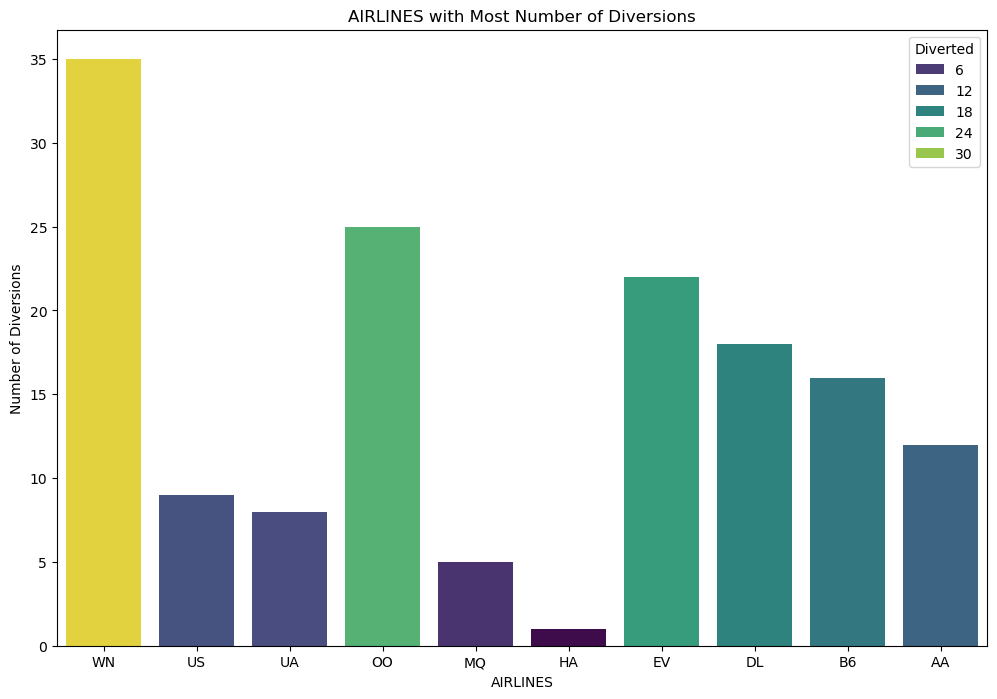

In [703]:
df = pd.DataFrame(collection.aggregate([
    {'$match':
        {'DIVERTED':1}
    },
    {
        "$group":{
            "_id":"$AIRLINE",
            "Diverted":{"$sum":"$DIVERTED"}
        }
    },
    {
        "$sort":{
            "_id":-1
        }
    }
]))

plt.figure(figsize=(12, 8))
sns.barplot(x=df['_id'], y=df['Diverted'], palette='viridis' ,hue=df['Diverted'])
plt.xlabel('AIRLINES')
plt.ylabel('Number of Diversions')
plt.title('AIRLINES with Most Number of Diversions')
plt.show()

16. Finding days of month that see the most number of diversion and delays.

In [704]:
pd.DataFrame(collection.aggregate([
    {
        "$group":
        {
            "_id":"$DAY",
            "total_diversions":{"$sum": "$DIVERTED"},
            "total_delay": {"$sum":{"$add": ["$ARRIVAL_DELAY", "$DEPARTURE_DELAY"]}}
        }
    },
    {
        "$project":
        {
            "_id":0,
            "DAY":"$_id",
            "total_diversions":1,
            "total_delay":1,
        }
    },
    {
        "$sort":
        {
            "total_delay":-1,
            "total_diversion":-1
        }
    }

]))

,total_diversions,total_delay,DAY
0,12,93482.382267,4
1,5,89013.042153,3
2,11,87888.040815,5
3,15,83444.060757,2
4,13,69743.055446,1
5,7,66690.840215,6
6,3,43927.005877,26
7,4,42470.343722,12
8,5,37673.087510,8
9,9,36363.756716,9


17. Write a MongoDB query to find the flights with the shortest and longest AIR_TIME. Return the flightNumber, airline, and AIR_TIME.

In [705]:
time_data = collection.aggregate([
    {'$facet':{
        'long': [
            {'$project': {'_id': 0,'FLIGHT_NUMBER': 1,'AIRLINE':1,'AIR_TIME':1}},
            {'$sort': {'AIR_TIME':-1}},
            {'$limit': 1}
        ],
        'short': [
            {'$project': {'_id': 0,'FLIGHT_NUMBER': 1,'AIRLINE':1,'AIR_TIME':1}},
            {'$sort': {'AIR_TIME':1}},
            {'$limit': 1}
        ],
    }}
])

for x in time_data:
    print(x)



{'long': [{'AIRLINE': 'UA', 'FLIGHT_NUMBER': 15, 'AIR_TIME': 654.0}], 'short': [{'AIRLINE': 'AS', 'FLIGHT_NUMBER': 65, 'AIR_TIME': 9.0}]}


18. Finding all diverted Route from a source to destination Airport & which route is the most diverted route.

In [706]:
pd.DataFrame(collection.aggregate([
    {'$match': {'DIVERTED': 1}}, 
    {'$group': {
        '_id': {
            'ORIGIN_AIRPORT': '$ORIGIN_AIRPORT',
            'DESTINATION_AIRPORT': '$DESTINATION_AIRPORT'
        },
        'COUNT': {'$sum': 1}
    }},
    {'$project': {
        '_id': 0,
        'ORIGIN_AIRPORT': '$_id.ORIGIN_AIRPORT',
        'DESTINATION_AIRPORT': '$_id.DESTINATION_AIRPORT',
        'COUNT': 1
    }},
    {'$sort': {'COUNT': -1}},
    {'$limit':1}
]))

,COUNT,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,2,JFK,SEA


19. Write a MongoDB aggregation pipeline to calculate the all aggregated values for departure delay (DEPARTURE_DELAY) and arrival delay (ARRIVAL_DELAY) for each airline, excluding flights that were either cancelled or diverted.

In [707]:
pd.DataFrame(collection.aggregate([
    {
        "$match": 
        {
            "CANCELLED":0,
            "DIVERTED":0
        }
    },
    {
        "$group":
        {
            "_id":"$AIRLINE",
            "avg_departure_delay":{"$avg":"$DEPARTURE_DELAY"},
            "avg_arrival_delay":{"$avg":"$ARRIVAL_DELAY"}
        }
    },
    {
        "$sort":
        {
            "avg_departure_delay":-1
        }
    }
]))

,_id,avg_departure_delay,avg_arrival_delay
0,F9,23.514687,24.103448
1,MQ,16.762569,19.231593
2,B6,15.888144,13.958525
3,NK,15.527751,14.206426
4,UA,14.167578,6.697222
5,OO,11.471067,10.154792
6,EV,11.424400,10.884271
7,AA,11.414849,8.386632
8,WN,10.064346,3.697840
9,DL,9.922761,2.814473


20. Write a MongoDB query to find all flights that were delayed due to WEATHER_DELAY but were not cancelled or diverted. Include the flightNumber, airline, originAirport, and destinationAirport in the results.

In [708]:
pd.DataFrame(collection.find(
    {
        "WEATHER_DELAY": {"$gt": 0}, 
        "CANCELLED": 0,
        "DIVERTED": 0
    },
    {
        "_id": 0,
        "FLIGHT_NUMBER": 1,
        "AIRLINE": 1,
        "ORIGIN_AIRPORT": 1,
        "DESTINATION_AIRPORT": 1
    }
))

,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,UA,532,ORD,DCA
1,US,1784,BWI,PHX
2,MQ,3019,ORD,OKC
3,MQ,3564,GSO,LGA
4,UA,1667,ORD,PDX
...,...,...,...,...
958,MQ,2942,ORD,DAY
959,UA,1549,MCO,ORD
960,MQ,3457,ROC,ORD
961,DL,2449,LGA,DTW


21. Write a MongoDB query to find all flights that were delayed both at departure (DEPARTURE_DELAY) and arrival (ARRIVAL_DELAY). Return the count of such Flights which are delayed.

In [709]:
pd.DataFrame(collection.aggregate([
    {"$match": {
        "ARRIVAL_DELAY": {"$gt": 0.0},
        "DEPARTURE_DELAY": {"$gt": 0.0},
        
    }},
    {'$group': {
        "_id": "null",
        "delay_count": {"$sum": 1}
    }},
    {
        "$project":
        {
            "_id":0,
            "delay_count":1
        }
    },
]))

,delay_count
0,18697


22. Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined time intervals (e.g., every hour) throughout the day. Generate a Suitable Plot.

In [716]:
results = list(collection.aggregate([
    {
        "$project": {
            "hour_of_day": { "$floor": { "$divide": ["$WHEELS_OFF", 100] } },
            "flight_type": { "$cond": [ { "$gt": ["$WHEELS_OFF", "$WHEELS_ON"] }, "takeoff", "landing" ] }
        }
    },
    {
        "$group": {
            "_id": { "hour": "$hour_of_day", "type": "$flight_type" },
            "count": { "$sum": 1 }
        }
    },
    {
        "$group": {
            "_id": "$_id.hour",
            "takeoffs": { "$sum": { "$cond": [ { "$eq": ["$_id.type", "takeoff"] }, "$count", 0 ] } },
            "landings": { "$sum": { "$cond": [ { "$eq": ["$_id.type", "landing"] }, "$count", 0 ] } }
        }
    },
    { "$sort": { "_id": 1 } }
]))



hours = [int(result['_id']) for result in results]
takeoffs = [result['takeoffs'] for result in results]
landings = [result['landings'] for result in results]


hours
plt.figure(figsize=(10, 5))
plt.plot(hours, takeoffs, label='Takeoffs')
plt.plot(hours, landings, label='Landings')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.title('Flight Takeoffs and Landings by Hour')
plt.legend()
plt.grid(True)
plt.show()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

23. Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined week of day. Generate a Suitable Plot.

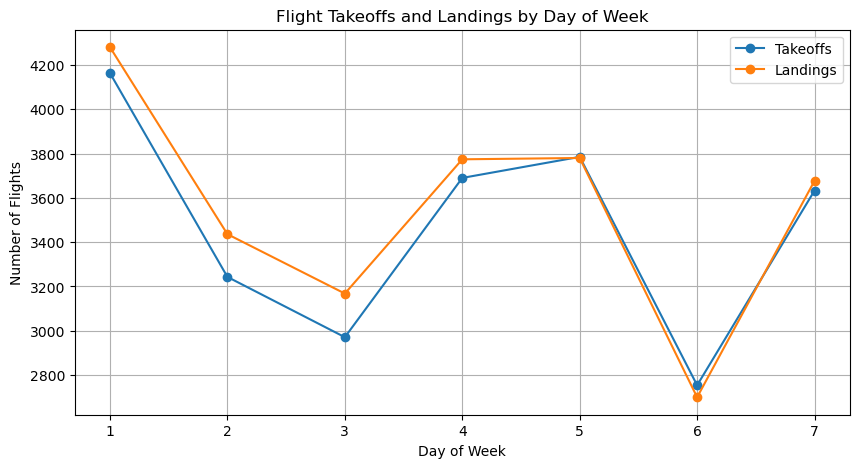

In [711]:
df = pd.DataFrame(collection.aggregate([
    {
        "$group": {
            "_id": "$DAY_OF_WEEK",
            "takeoffs": { "$sum": { "$cond": [{ "$gt": ["$DEPARTURE_DELAY", 0] }, 1, 0] } },
            "landings": { "$sum": { "$cond": [{ "$gt": ["$ARRIVAL_DELAY", 0] }, 1, 0] } }
        }
    },
    {
        "$sort": {
            "_id": 1
        }
    }
]))

plt.figure(figsize=(10, 5))
plt.plot(df['_id'], df['takeoffs'], marker='o', label='Takeoffs')
plt.plot(df['_id'], df['landings'], marker='o', label='Landings')
plt.xlabel('Day of Week') 
plt.ylabel('Number of Flights')
plt.title('Flight Takeoffs and Landings by Day of Week')
plt.legend()
plt.grid(True)
plt.show()

24. Write a MongoDB query to find all flights that departed between 6 AM and 12 PM (noon) local time, regardless of the date. Return the flightNumber, airline, and departureTime. Generate a Bar Plot using Time (x-axis) and Frequency (y-axis).

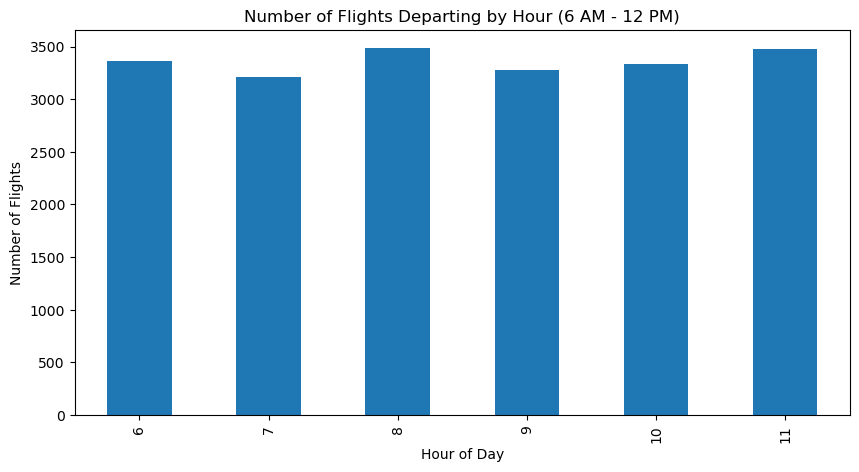

In [712]:
query = [
    {
        "$match": {
            "DEPARTURE_TIME": {
                "$gte": 600,  
                "$lt": 1200   
            }
        }
    },
    {
        "$project": {
            "FLIGHT_NUMBER": 1,
            "AIRLINE": 1,
            "DEPARTURE_TIME": 1
        }
    }
]

data = list(collection.aggregate(query))
df = pd.DataFrame(data)


df['DEPARTURE_HOUR'] = (df['DEPARTURE_TIME'] // 100).astype(int)


plt.figure(figsize=(10, 5))
df['DEPARTURE_HOUR'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.title('Number of Flights Departing by Hour (6 AM - 12 PM)')

plt.show()

25. When is the best time of day/day of week/time of a year to fly with minimum delays?

In [713]:
pd.DataFrame(collection.aggregate([
    {
        "$group":
            {
                "_id":"$DAY",
                "avg_delay": {"$avg": {'$add': ['$ARRIVAL_DELAY','$DEPARTURE_DELAY']}}
            }
    },
    {
        "$sort":
        {
            "avg_delay":1,
        }
    }
]))

,_id,avg_delay
0,31,4.389829
1,29,5.037463
2,10,5.210236
3,14,7.376838
4,19,8.344266
5,15,10.835478
6,18,11.247126
7,7,11.286903
8,13,11.303135
9,23,12.180267


In [714]:
pd.DataFrame(collection.aggregate([
    {
        "$group":
            {
                "_id":"$DAY_OF_WEEK",
                "avg_delay": {"$avg": {'$add': ['$ARRIVAL_DELAY','$DEPARTURE_DELAY']}}
            }
    },
    {
        "$sort":
        {
            "avg_delay":1,
        }
    }
]))

,_id,avg_delay
0,6,14.678226
1,3,14.824947
2,5,16.199401
3,4,18.090532
4,2,19.374128
5,7,23.601915
6,1,24.667675


In [715]:
pd.DataFrame(collection.aggregate([
    {
        "$group":
            {
                "_id":"$MONTH",
                "avg_delay": {"$avg": {'$add': ['$ARRIVAL_DELAY','$DEPARTURE_DELAY']}}
            }
    },
    {
        "$sort":
        {
            "avg_delay":1,
        }
    }
]))

,_id,avg_delay
0,1,15.689143
1,2,19.950781
2,3,25.768867
